## Install Libaries

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 56.8 MB/s eta 0:00:00


## Import Libraries

In [2]:
from ultralytics import YOLO
from IPython.display import display, Image

import glob

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# for setting locale
import locale
locale.getpreferredencoding = lambda: "UTF-8"

## Dataset Preparation

Dataset Link: https://data.mendeley.com/datasets/8h3s6jkyff/1

In [4]:
# create the `datasets/` directory
!mkdir datasets

In [5]:
# download the dataset from roboflow
!curl -L "https://universe.roboflow.com/ds/UfvZiKcX3m?key=fWDBwZKQSV" > dataset.zip

# extract the dataset zip to the `datasets/` directory
!unzip -q dataset.zip -d datasets/

# delete the dataset zip
!rm dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   904  100   904    0     0   1860      0 --:--:-- --:--:-- --:--:--  1863
100  122M  100  122M    0     0  13.7M      0  0:00:08  0:00:08 --:--:-- 18.2M


In [6]:
# initialize some variables for important directories
home = "/content/"
dataset_loc = home + "datasets/"
descriptor_location = dataset_loc + "data.yaml"

## Model Download and Setup

In [7]:
# download YOLOv9c model from pretrained weight
model = YOLO("yolo11l.pt")

# display model information
model.info()

100%|██████████| 49.0M/49.0M [00:01<00:00, 42.5MB/s]


YOLO11l summary: 631 layers, 25,372,160 parameters, 0 gradients, 87.6 GFLOPs


(631, 25372160, 0, 87.6134912)

## Training with Custom Dataset

In [8]:
# train using gpu
model.to("cuda")

# train the model on the Tomato dataset for 10 epochs
train_results = model.train(data=descriptor_location, epochs=10, imgsz=416, plots=True, device=0)

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/content/datasets/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

100%|██████████| 755k/755k [00:00<00:00, 133MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    173824  ultralytics.nn.modules.block.C3k2            [128, 256, 2, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  2    691712  ultralytics.nn.modules.block.C3k2            [256, 512, 2, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  7                  -1  1   2360320  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 258MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/train/labels... 3628 images, 2 backgrounds, 0 corrupt: 100%|██████████| 3628/3628 [00:02<00:00, 1789.37it/s]

train: New cache created: /content/datasets/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/valid/labels... 1007 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1007/1007 [00:01<00:00, 720.44it/s]

val: New cache created: /content/datasets/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      5.44G      1.458      2.367       1.64         28        416: 100%|██████████| 227/227 [01:31<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.94it/s]

                   all       1007       1909       0.41      0.242      0.178      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      5.43G      1.608      2.124      1.759         17        416: 100%|██████████| 227/227 [01:27<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.29it/s]


                   all       1007       1909      0.554      0.212      0.175      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      5.33G      1.628      2.053      1.779         15        416: 100%|██████████| 227/227 [01:25<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.09it/s]


                   all       1007       1909      0.594      0.165      0.146     0.0794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      5.43G      1.577      1.955      1.741         19        416: 100%|██████████| 227/227 [01:25<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.15it/s]


                   all       1007       1909      0.489      0.239      0.205       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      5.38G      1.509       1.75      1.683         25        416: 100%|██████████| 227/227 [01:25<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.39it/s]

                   all       1007       1909      0.672      0.253      0.278       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      5.42G      1.435       1.57      1.625         22        416: 100%|██████████| 227/227 [01:24<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.12it/s]


                   all       1007       1909      0.617      0.292      0.301      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      5.38G      1.357        1.4      1.568         17        416: 100%|██████████| 227/227 [01:25<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.14it/s]


                   all       1007       1909      0.574      0.288      0.325      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      5.43G      1.293      1.261      1.523         35        416: 100%|██████████| 227/227 [01:25<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.45it/s]


                   all       1007       1909      0.557      0.376      0.417      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      5.36G      1.237       1.13      1.483         31        416: 100%|██████████| 227/227 [01:27<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.38it/s]


                   all       1007       1909      0.689       0.37      0.452      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       5.4G      1.168      1.017      1.431         24        416: 100%|██████████| 227/227 [01:24<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.19it/s]


                   all       1007       1909      0.684      0.404       0.48      0.315

10 epochs completed in 0.288 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11l summary (fused): 464 layers, 25,290,877 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]


                   all       1007       1909      0.684      0.404      0.479      0.315
                  Mask         79         92      0.901     0.0992      0.495      0.307
                   can         18         20      0.459        0.2      0.208     0.0634
             cellphone         61         71       0.88      0.972      0.987       0.84
           electronics         27         40      0.466      0.525      0.503      0.282
               gbottle         36         82      0.406       0.72      0.619      0.392
                 glove         38         57      0.901      0.318      0.661      0.506
                 metal         10         22          1          0     0.0318     0.0144
                  misc         48         51      0.647      0.137      0.249      0.154
                   net        147        149       0.65      0.832        0.8       0.47
                  pbag        291        331      0.684      0.924      0.904       0.77
               pbottl

### Training Results

In [9]:
train_results.results_dict

{'metrics/precision(B)': 0.684172384556593,
 'metrics/recall(B)': 0.4038976717851562,
 'metrics/mAP50(B)': 0.4793348123195368,
 'metrics/mAP50-95(B)': 0.3152670660962004,
 'fitness': 0.33167384071853406}

In [10]:
!ls /content/runs/detect/train/

args.yaml					   PR_curve.png		  val_batch0_pred.jpg
confusion_matrix_normalized.png			   R_curve.png		  val_batch1_labels.jpg
confusion_matrix.png				   results.csv		  val_batch1_pred.jpg
events.out.tfevents.1736286582.2f94e8baa629.688.0  results.png		  val_batch2_labels.jpg
F1_curve.png					   train_batch0.jpg	  val_batch2_pred.jpg
labels_correlogram.jpg				   train_batch1.jpg	  weights
labels.jpg					   train_batch2.jpg
P_curve.png					   val_batch0_labels.jpg


/content


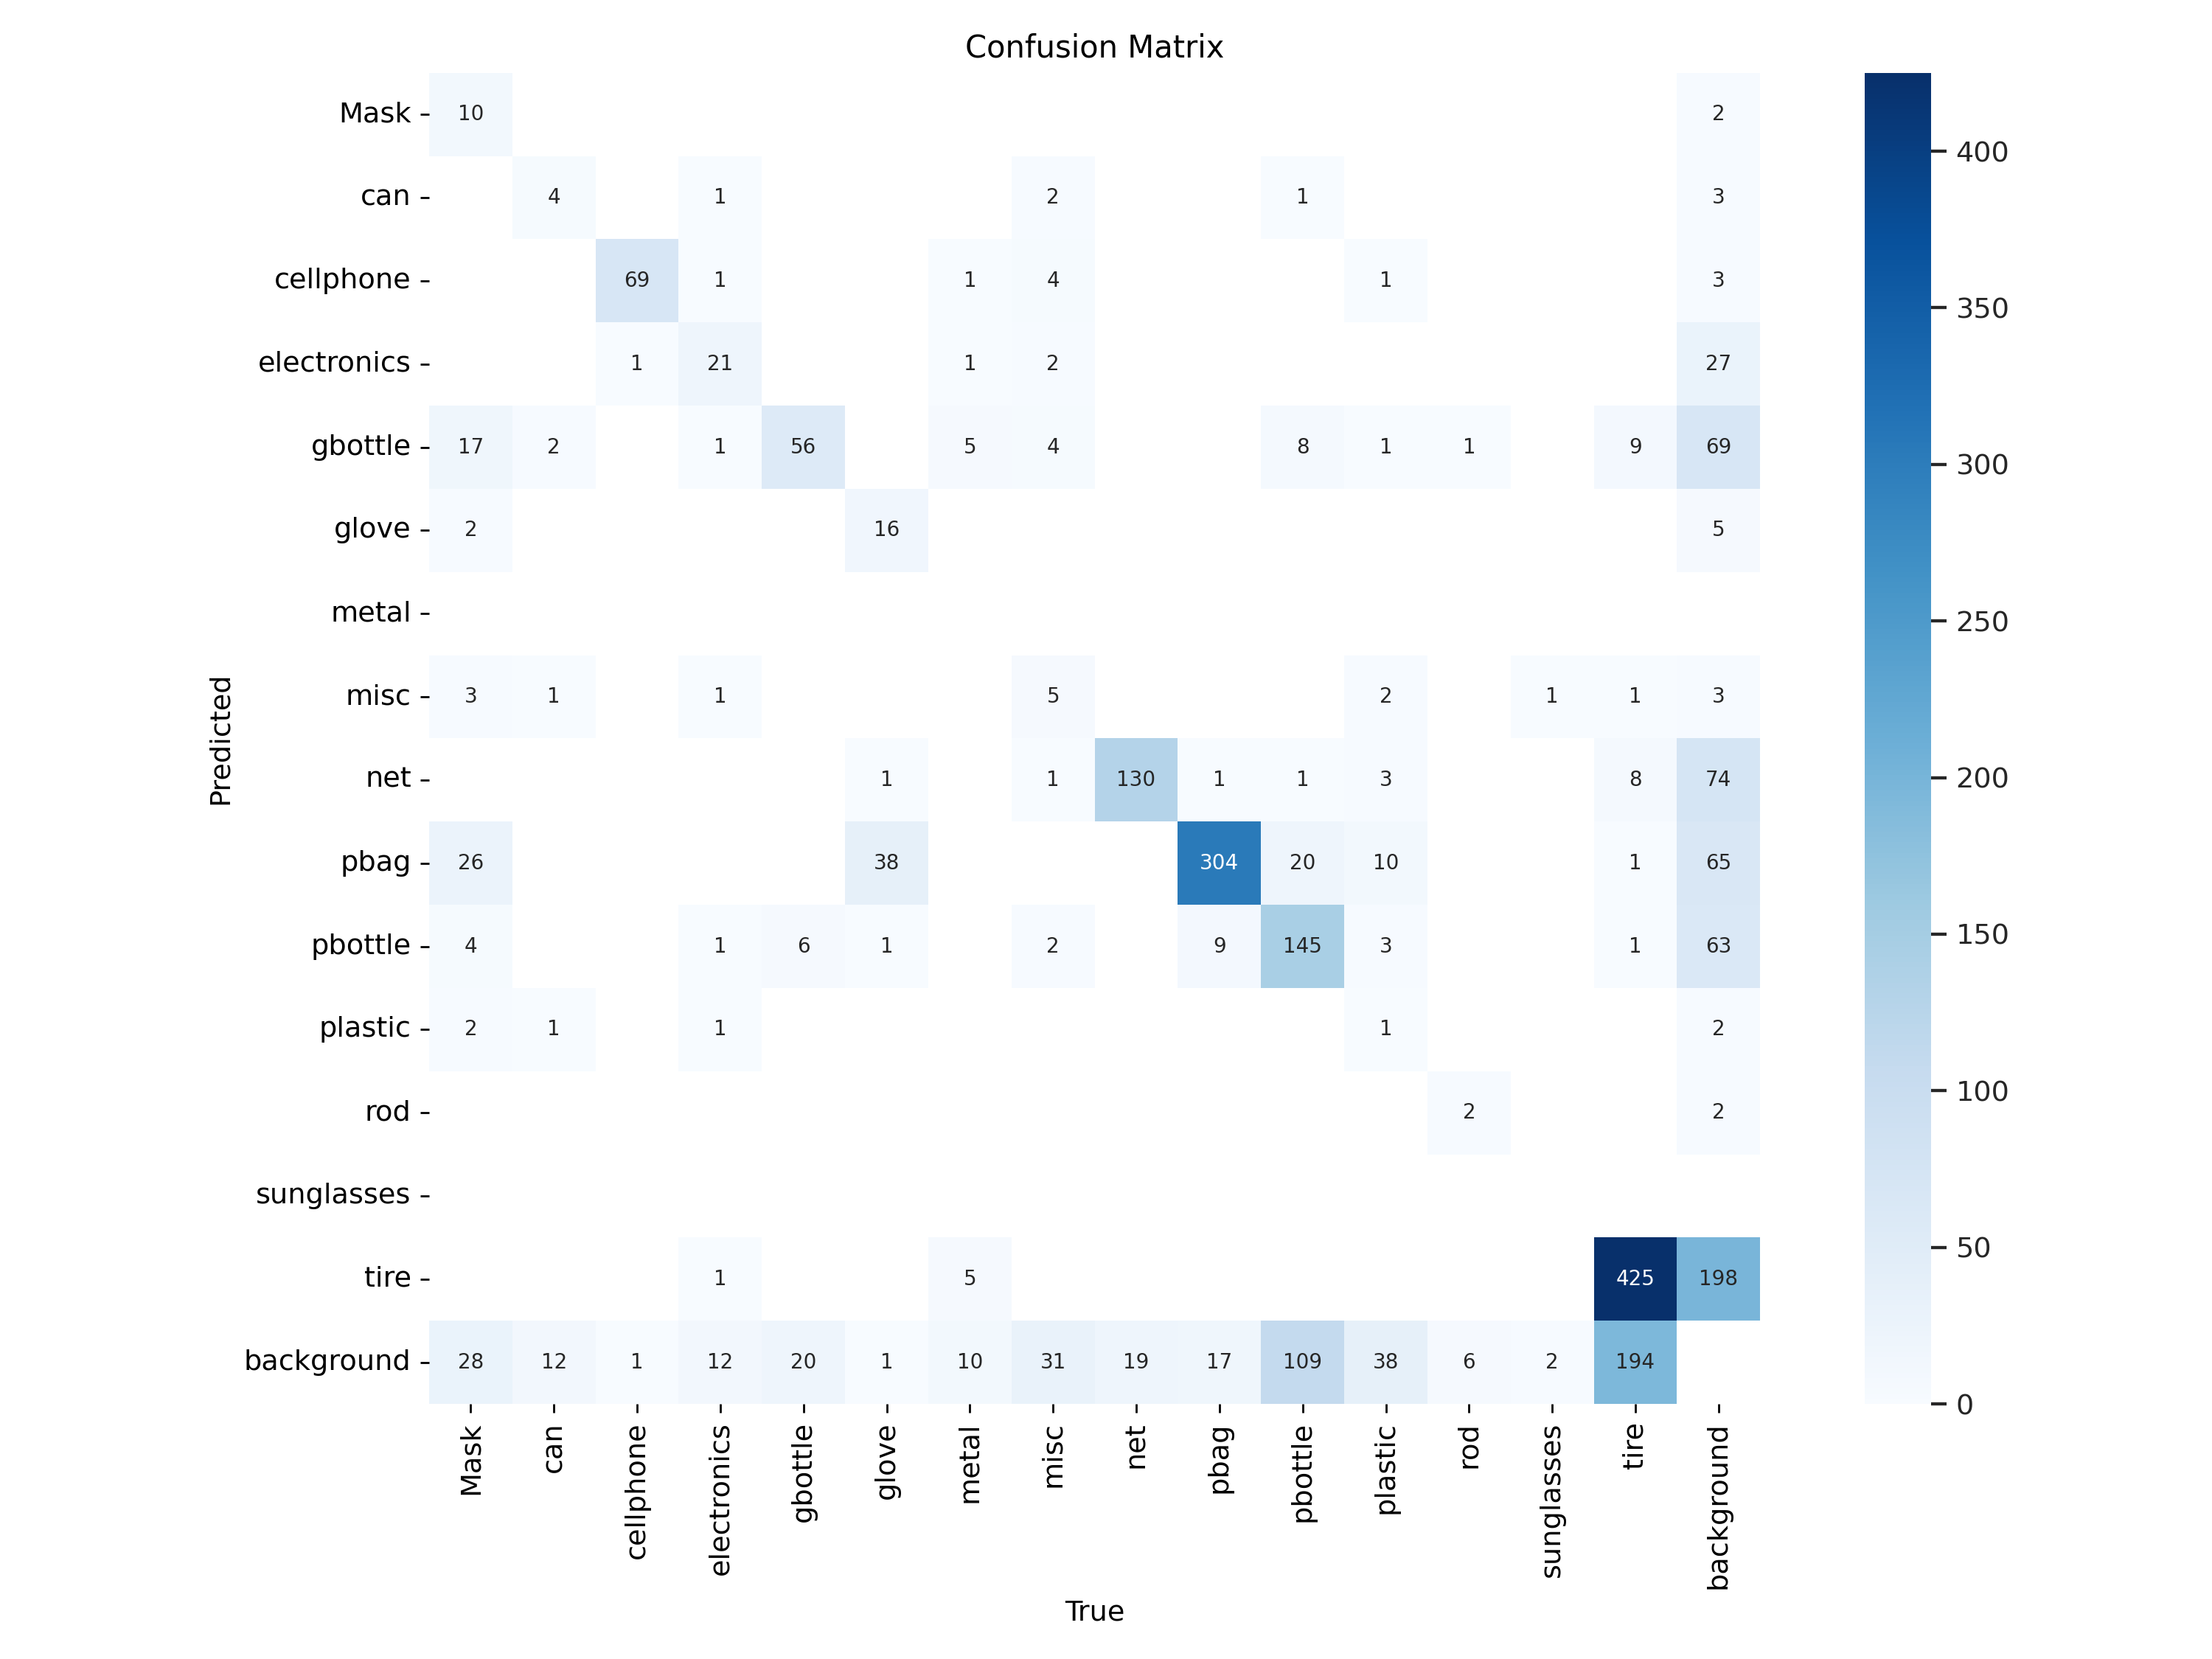

In [11]:
%cd {home}
Image(filename=f'{home}runs/detect/train/confusion_matrix.png', width=600)

/content


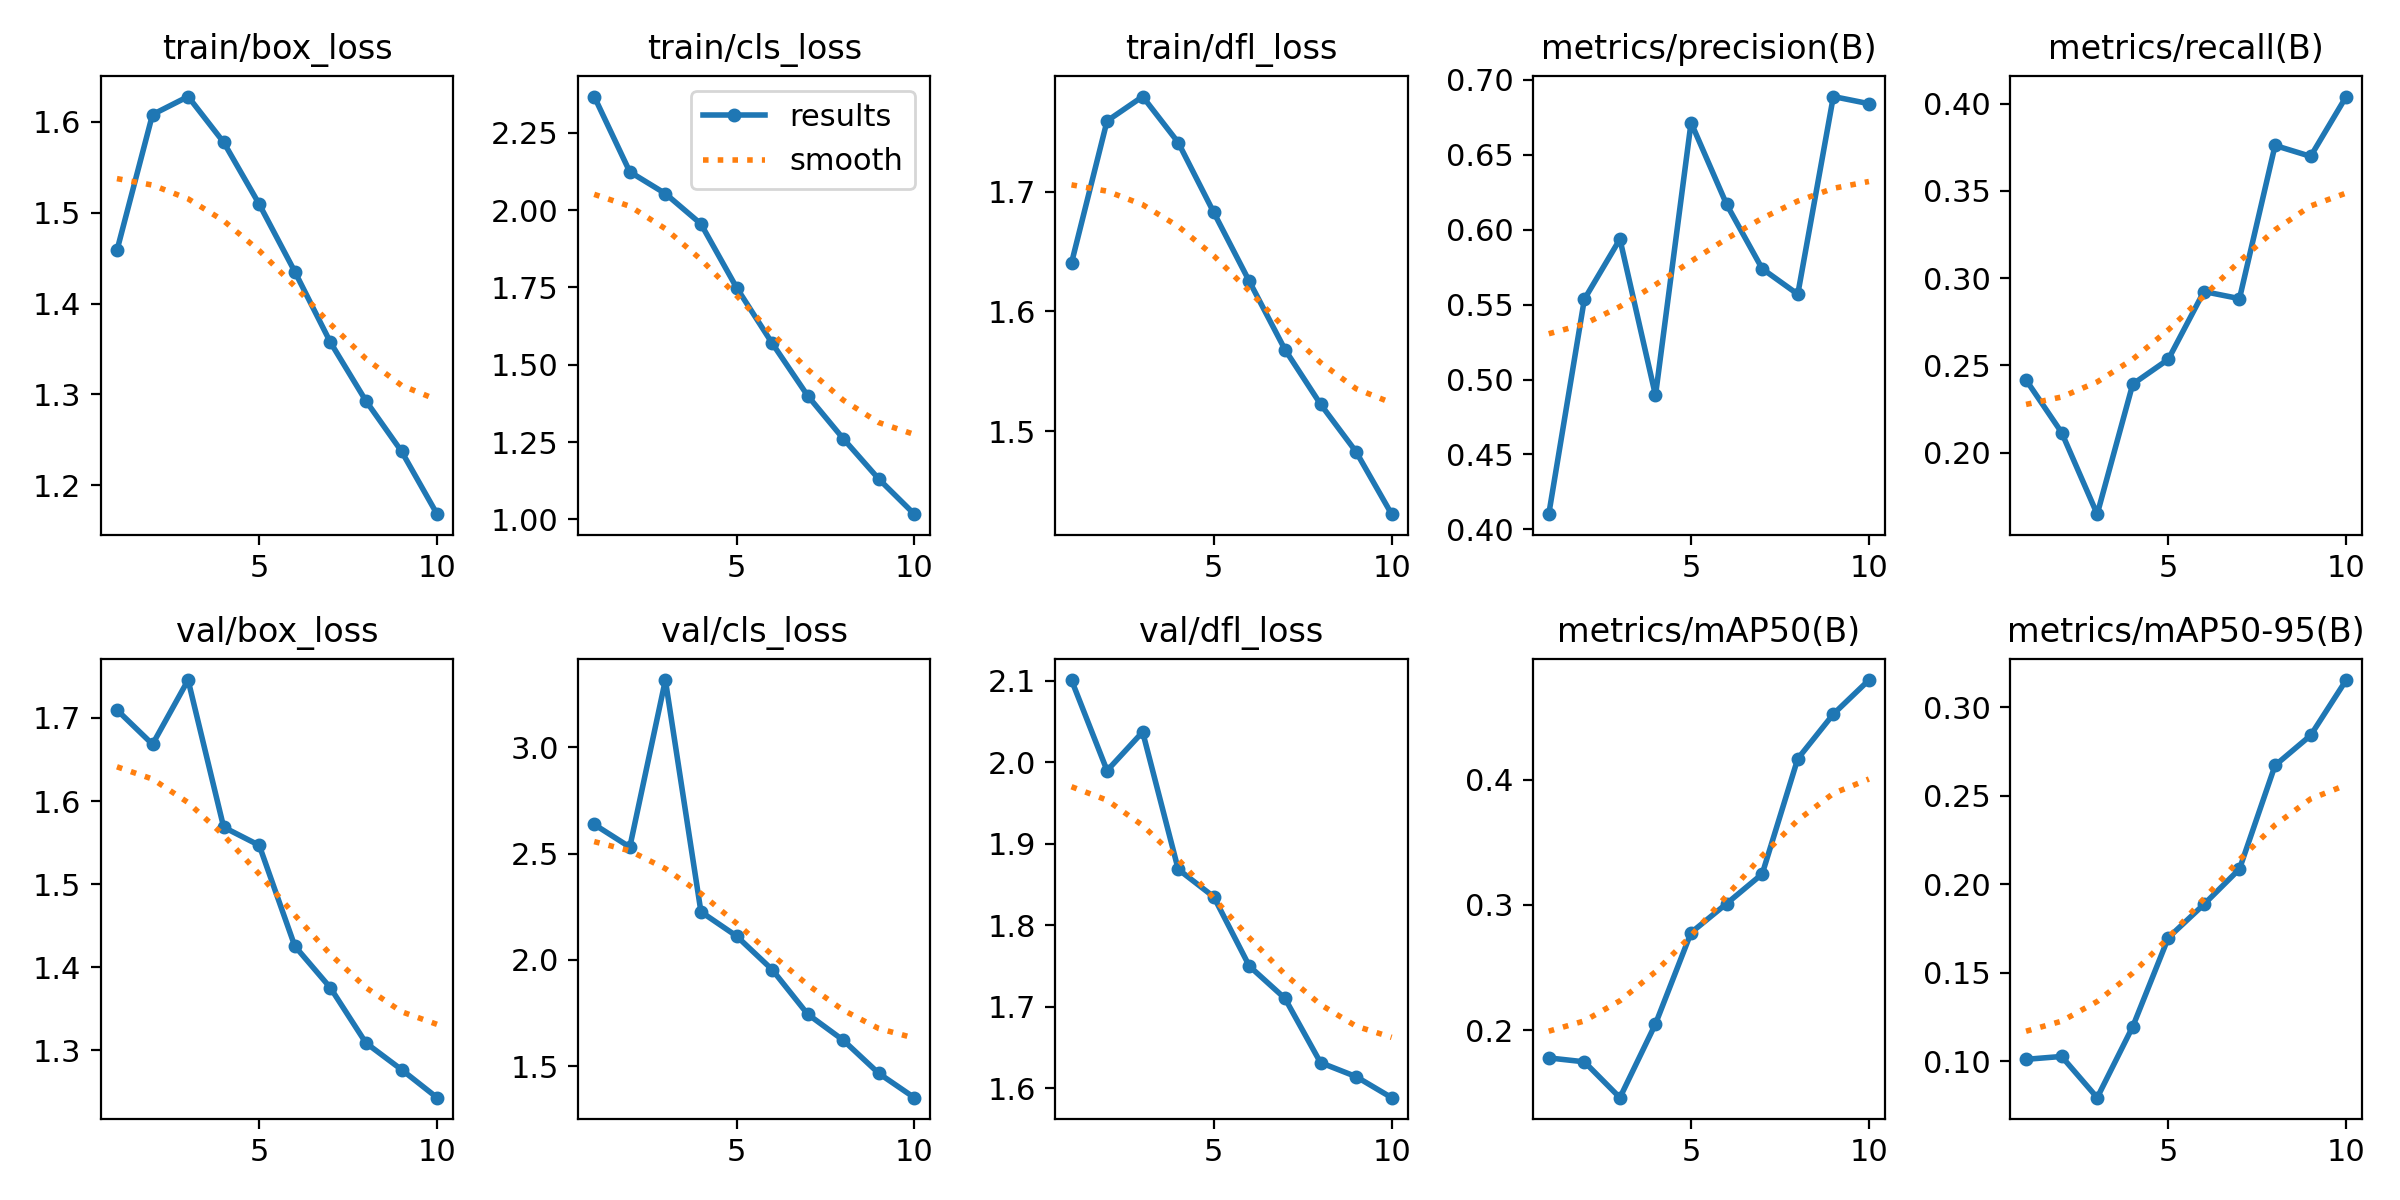

In [12]:
%cd {home}
Image(filename=f'{home}runs/detect/train/results.png', width=600)

/content


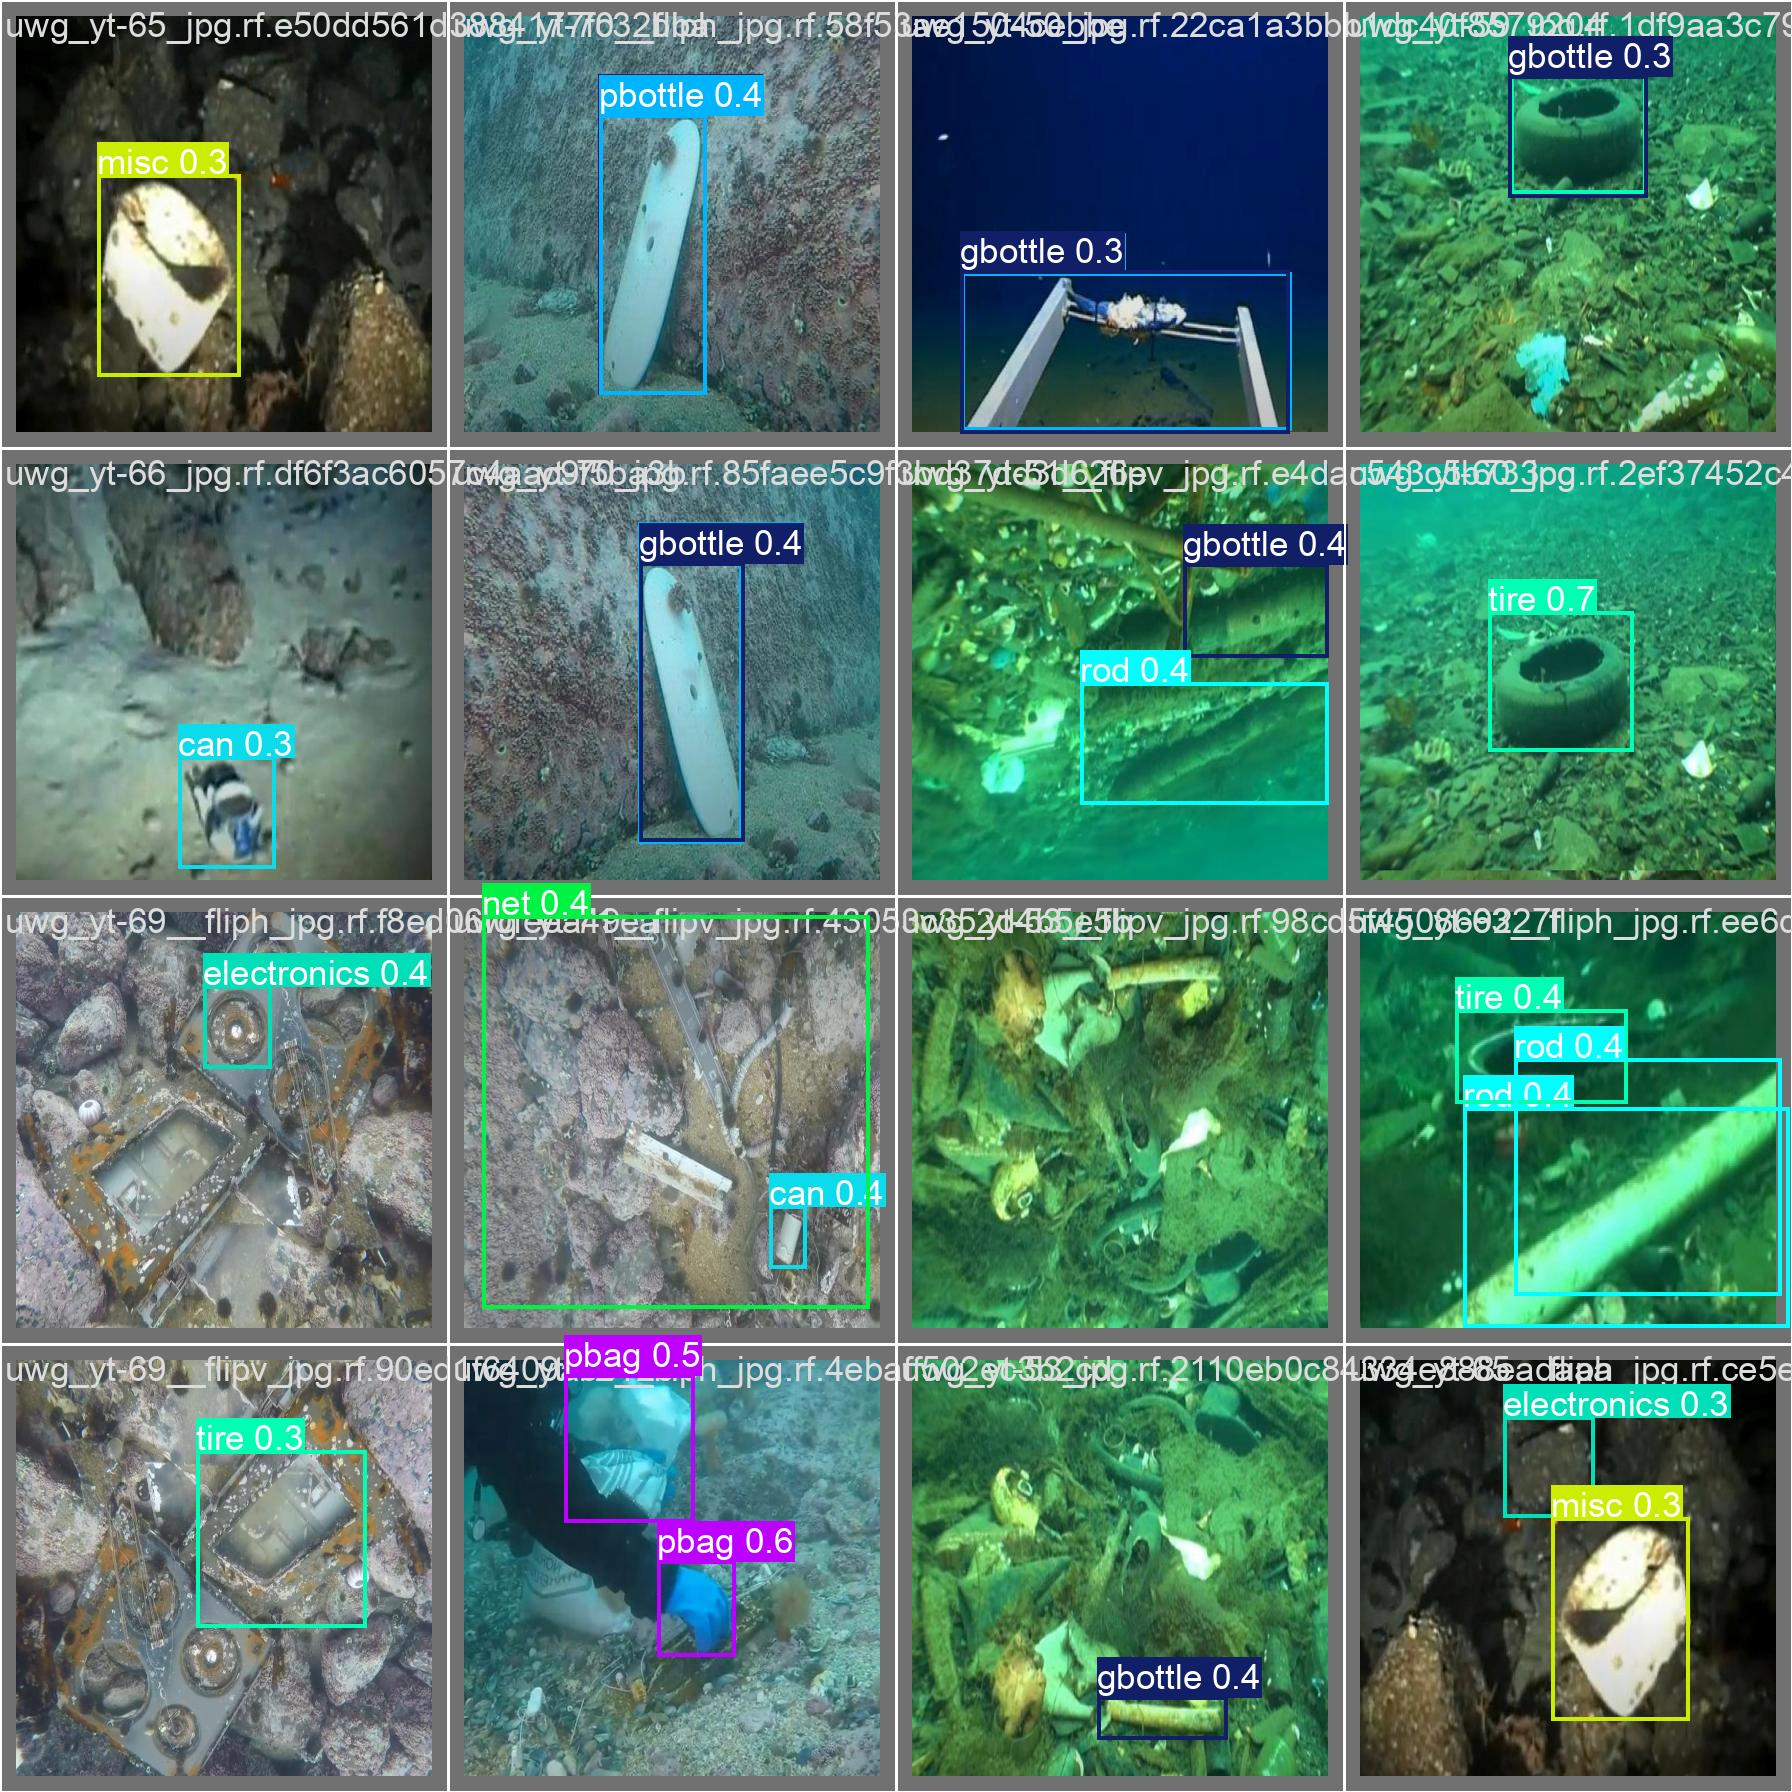

In [13]:
%cd {home}
Image(filename=f'{home}runs/detect/train/val_batch0_pred.jpg', width=600)

## Validation

In [14]:
validation_results = model.val()

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11l summary (fused): 464 layers, 25,290,877 parameters, 0 gradients, 86.6 GFLOPs


val: Scanning /content/datasets/valid/labels.cache... 1007 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1007/1007 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:18<00:00,  3.32it/s]


                   all       1007       1909      0.685      0.404      0.479      0.315
                  Mask         79         92      0.901      0.099      0.496      0.309
                   can         18         20       0.46        0.2      0.208     0.0637
             cellphone         61         71      0.885      0.972      0.987       0.84
           electronics         27         40      0.466      0.525      0.503      0.279
               gbottle         36         82      0.406       0.72      0.618      0.393
                 glove         38         57        0.9      0.317      0.661      0.506
                 metal         10         22          1          0     0.0318     0.0144
                  misc         48         51      0.647      0.137       0.25      0.155
                   net        147        149       0.65      0.832      0.799      0.471
                  pbag        291        331      0.685      0.927      0.903       0.77
               pbottl

### Validation Results

In [15]:
validation_results.results_dict

{'metrics/precision(B)': 0.6847371509425881,
 'metrics/recall(B)': 0.404147812616612,
 'metrics/mAP50(B)': 0.4793785687801985,
 'metrics/mAP50-95(B)': 0.31541582290284187,
 'fitness': 0.3318120974905775}

In [16]:
!ls /content/runs/detect/train2/

confusion_matrix_normalized.png  P_curve.png   val_batch0_labels.jpg  val_batch1_pred.jpg
confusion_matrix.png		 PR_curve.png  val_batch0_pred.jpg    val_batch2_labels.jpg
F1_curve.png			 R_curve.png   val_batch1_labels.jpg  val_batch2_pred.jpg


/content


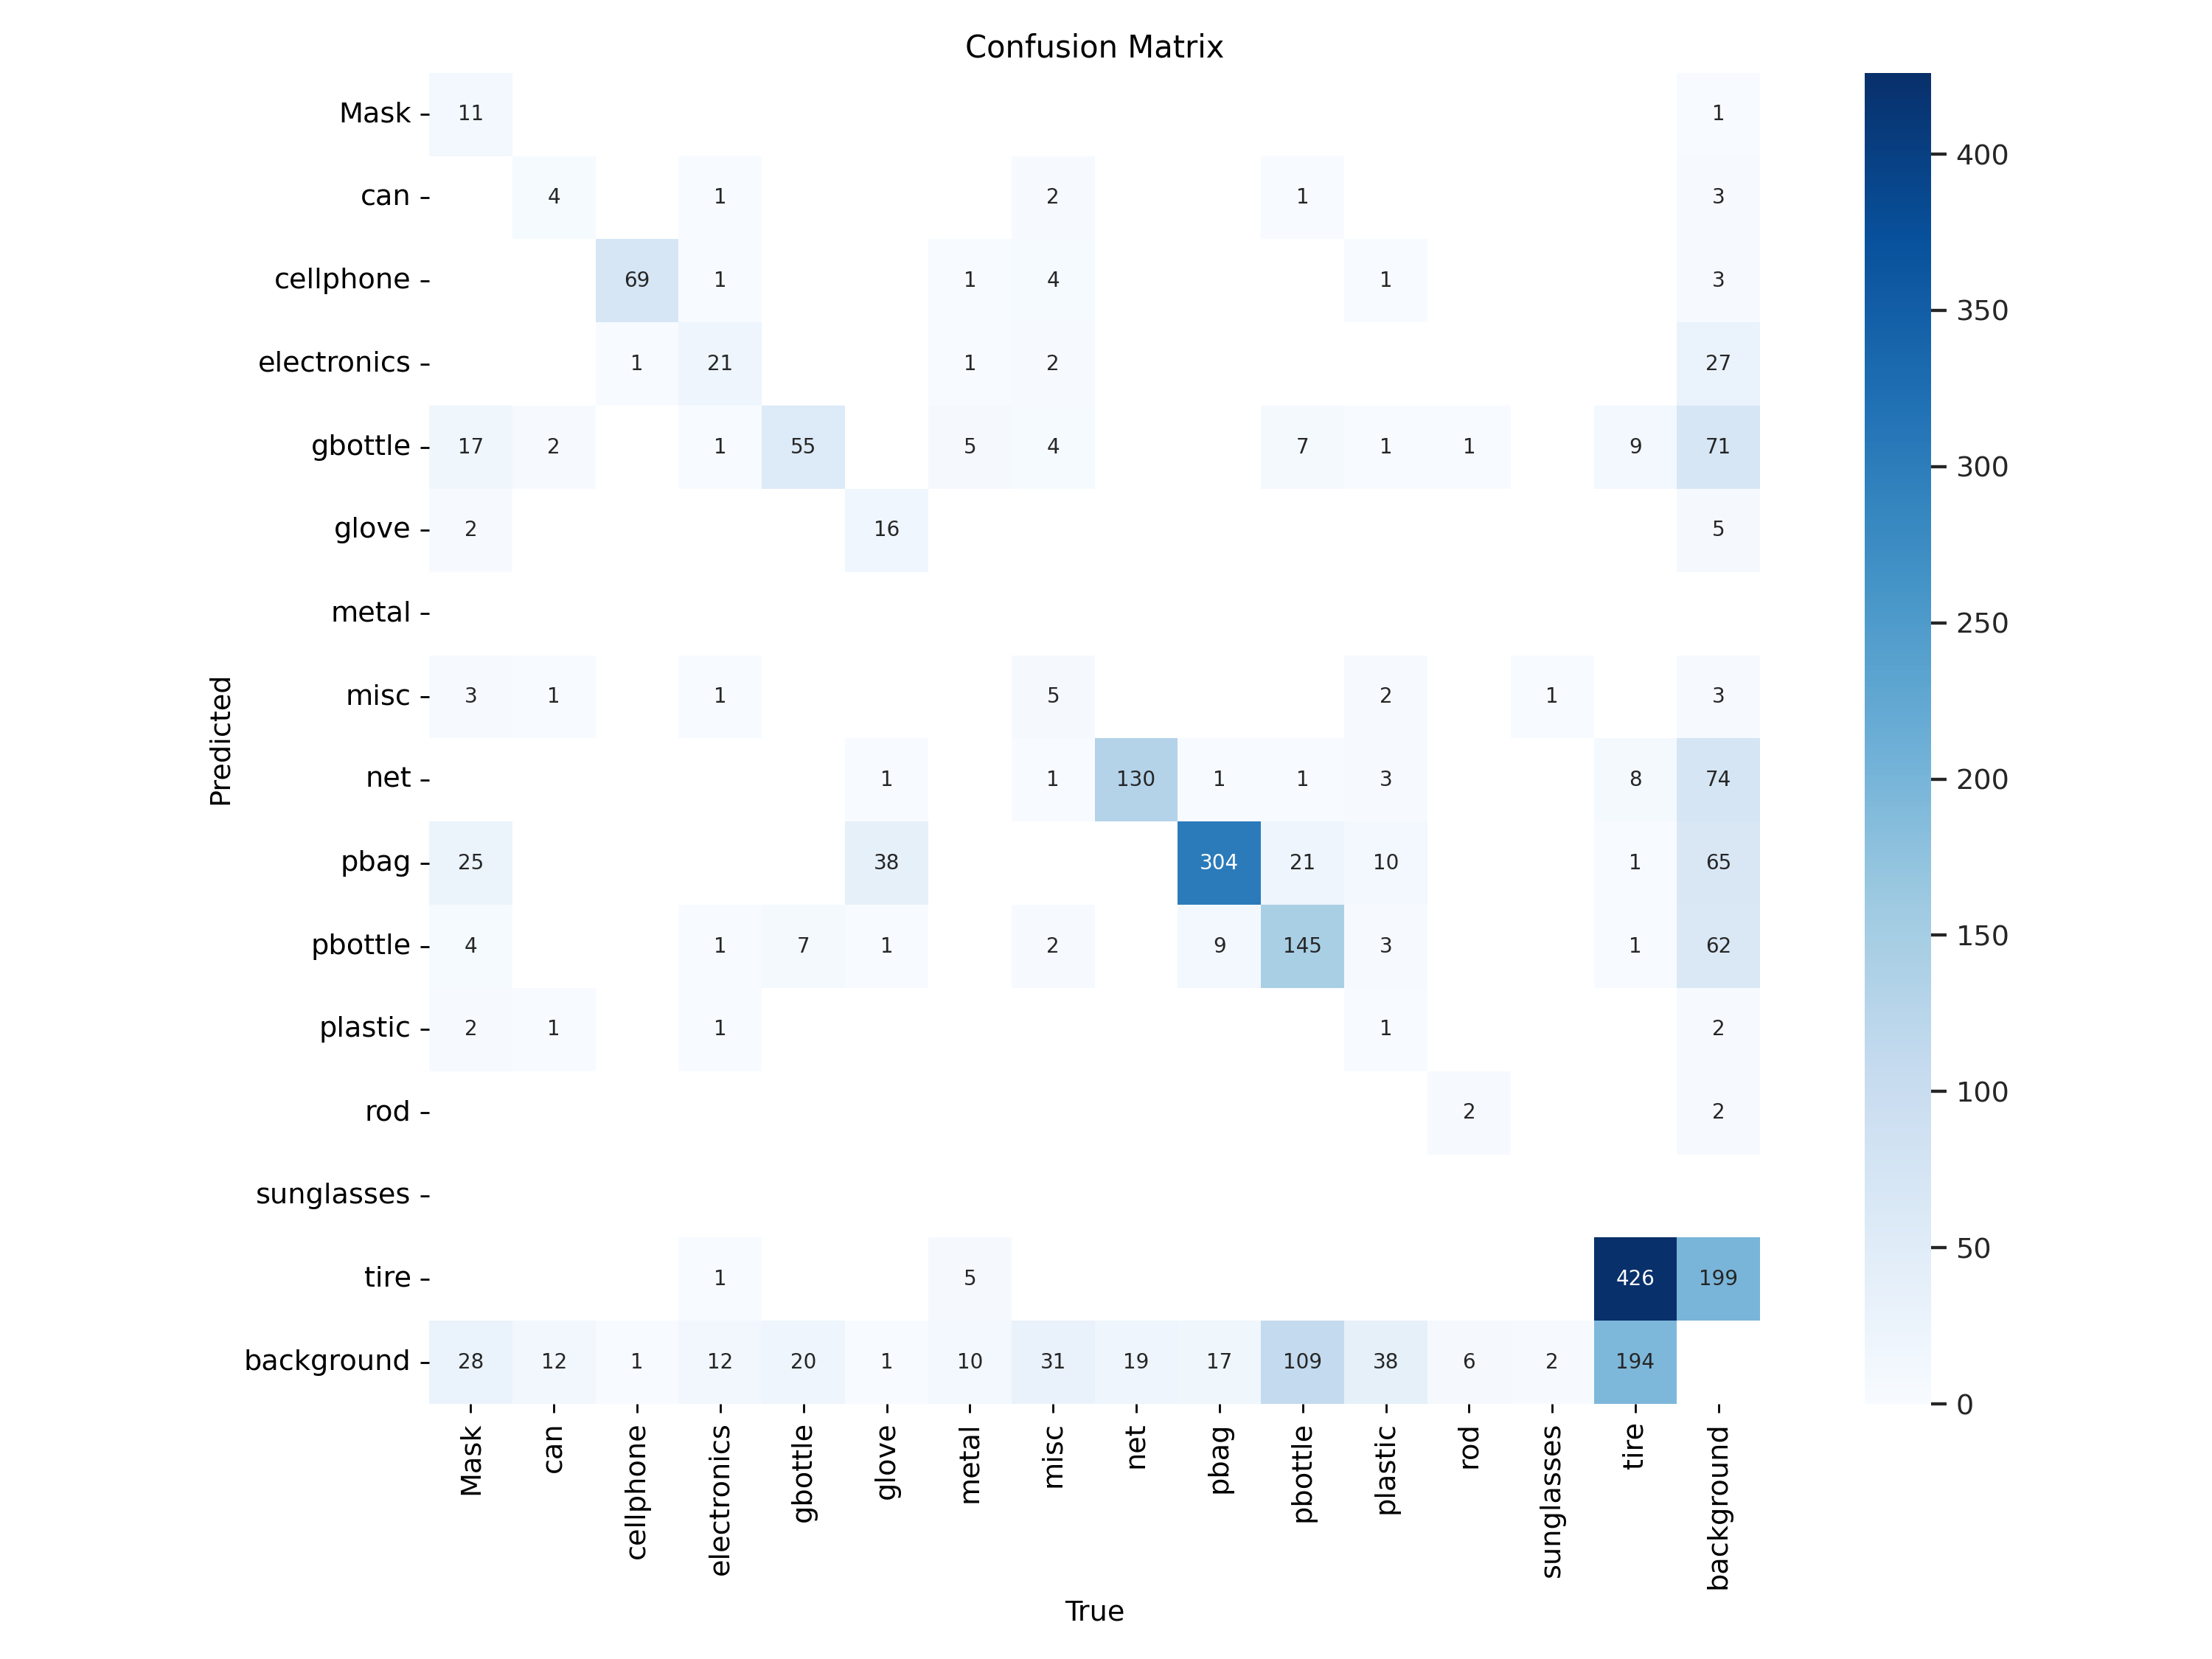

In [17]:
%cd {home}
Image(filename=f'{home}runs/detect/train2/confusion_matrix.png', width=600)

/content


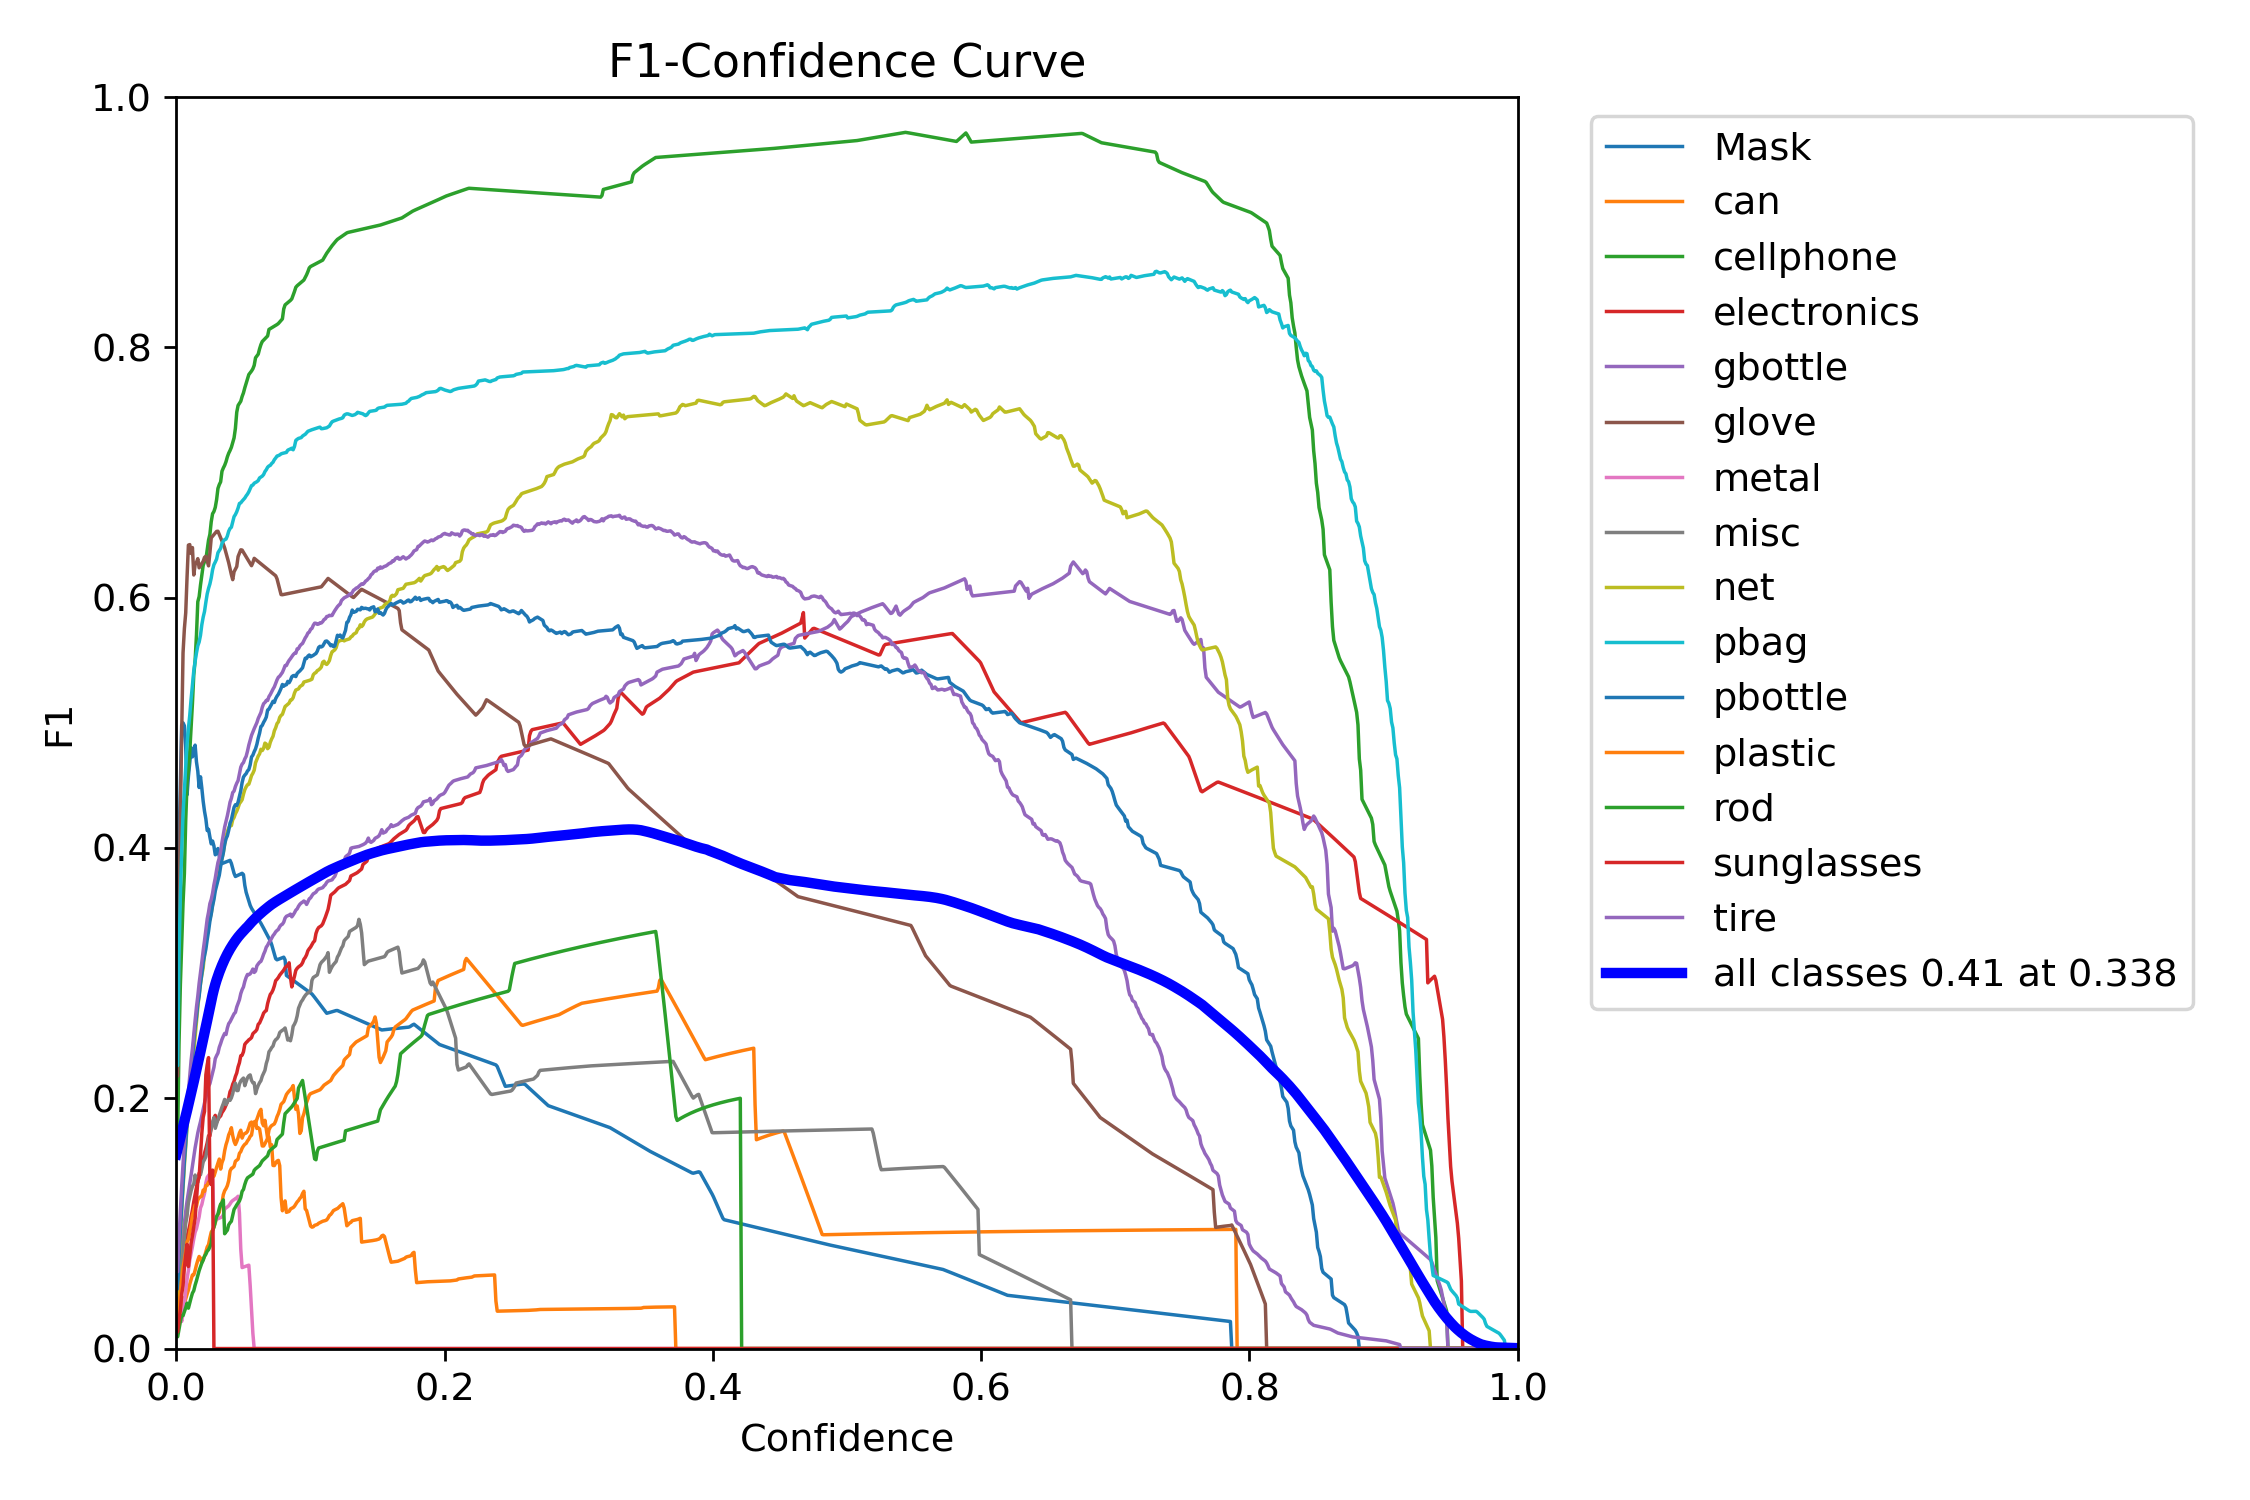

In [18]:
%cd {home}
Image(filename=f'{home}runs/detect/train2/F1_curve.png', width=600)

/content


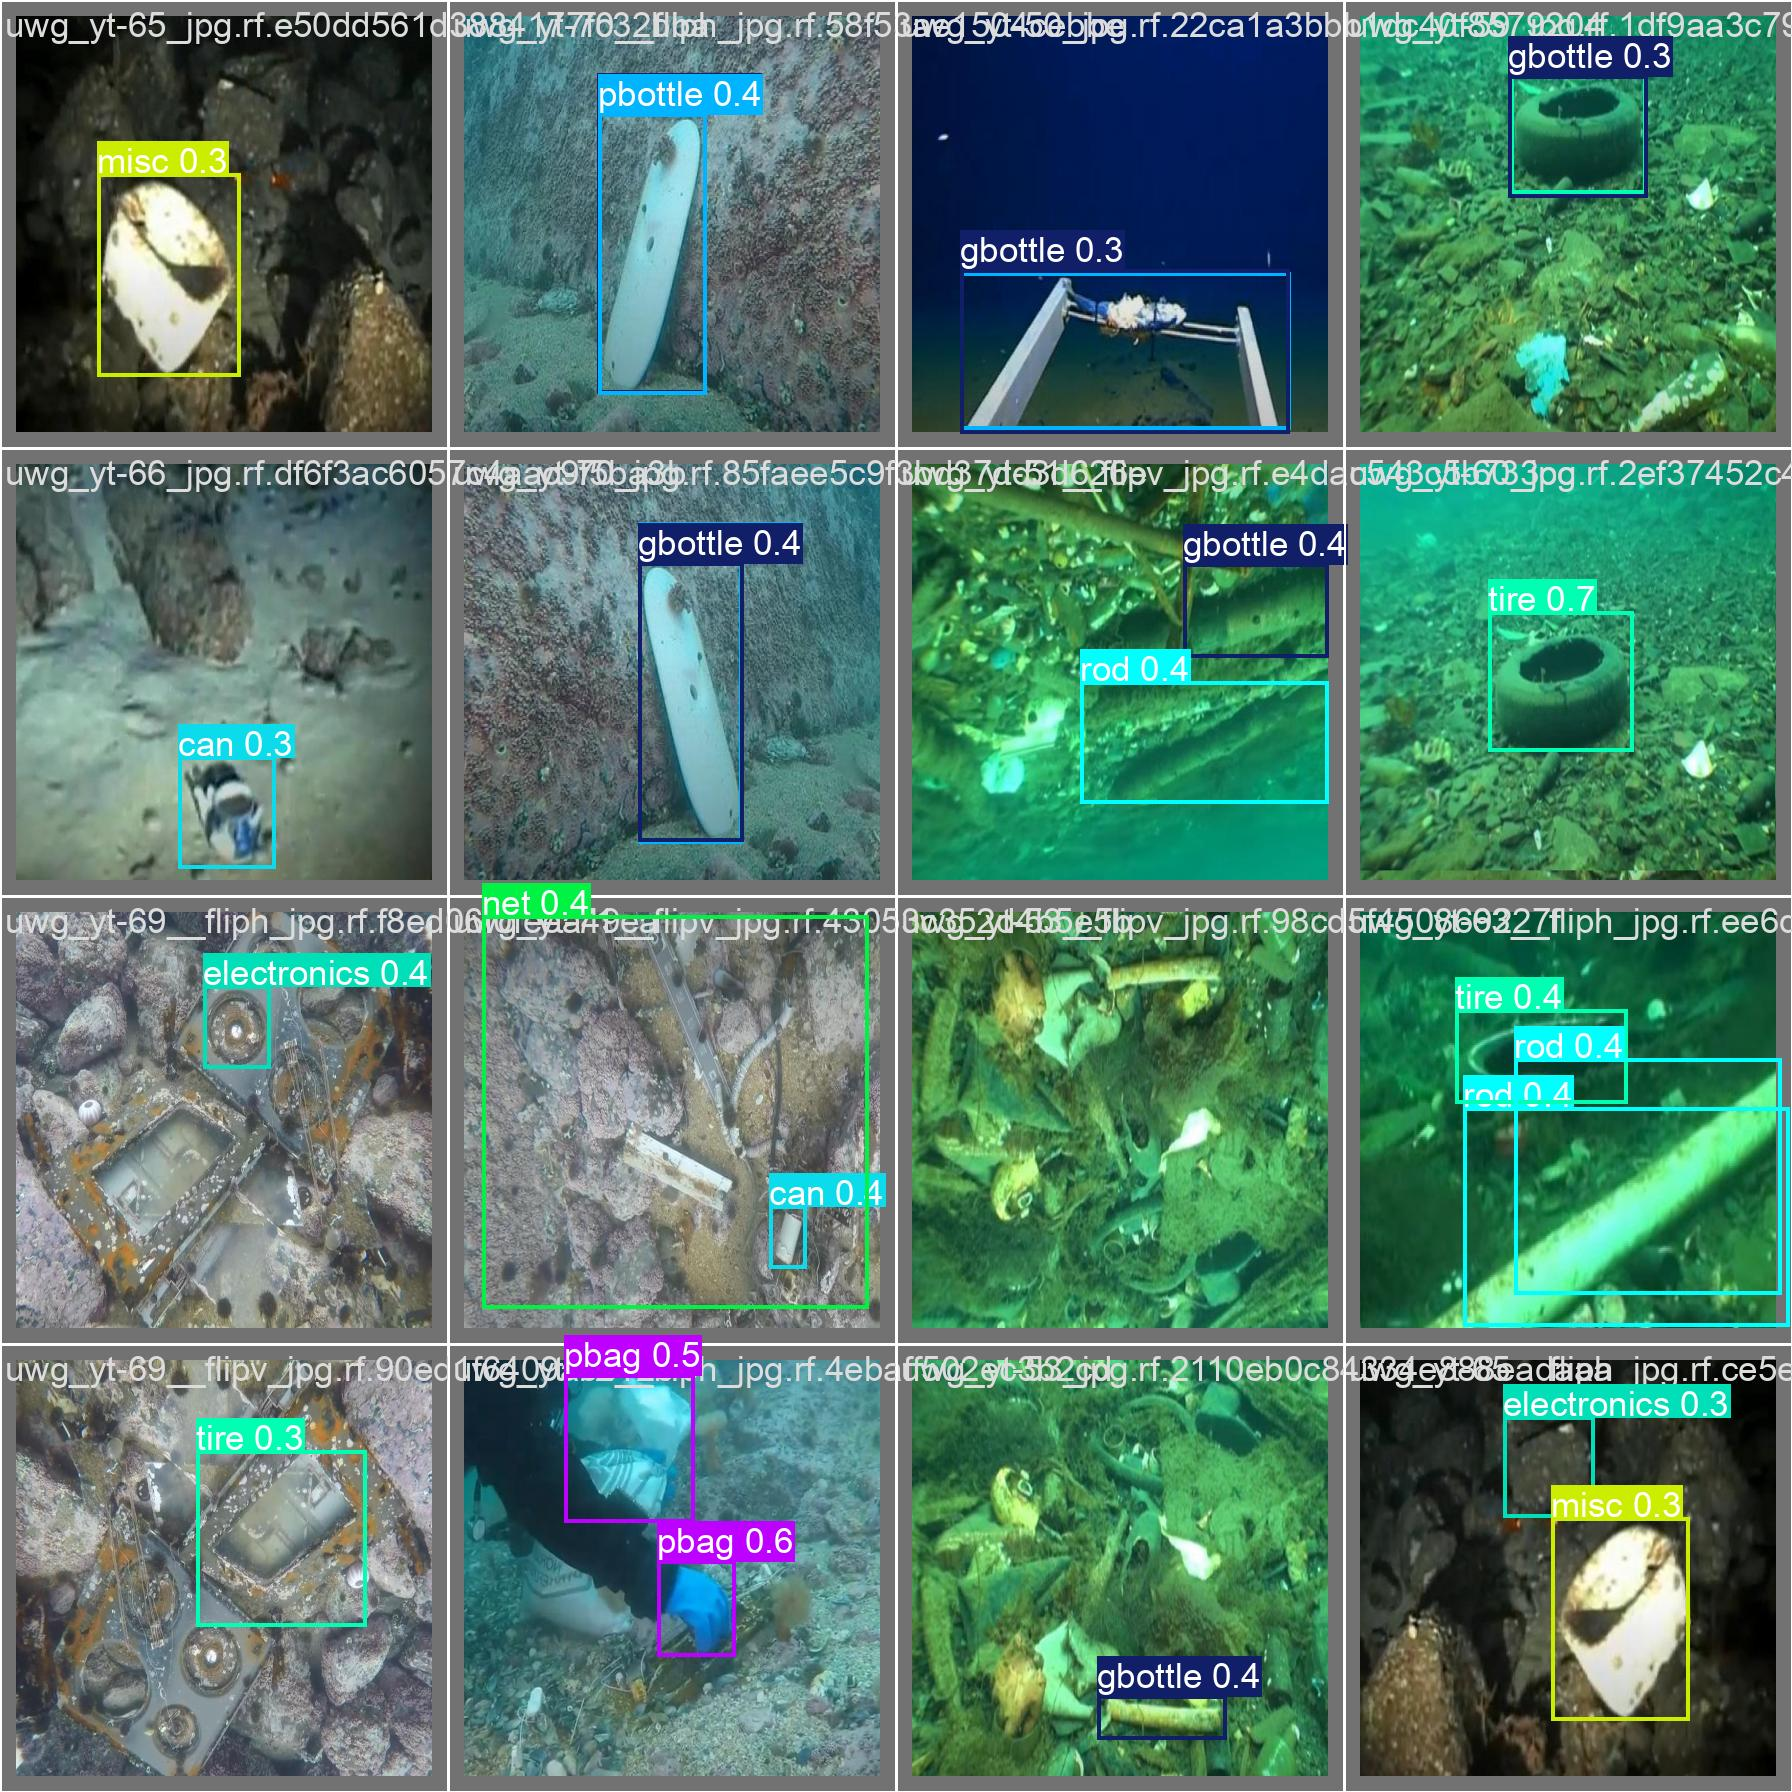

In [19]:
%cd {home}
Image(filename=f'{home}runs/detect/train2/val_batch0_pred.jpg', width=600)

## Inference/Prediction

In [20]:
prediction_results = model.predict(source=dataset_loc + "test/images", save=True)


image 1/501 /content/datasets/test/images/1bc7-iudfmpmn7245599_jpg.rf.c753c3518aa3bd30463da5e4b94a48be.jpg: 416x416 1 net, 28.1ms
image 2/501 /content/datasets/test/images/200623160205-05-coronavirus-waste-pollution-super-169_jpg.rf.e06b1a6873ec4240c3493f281822c9d9.jpg: 416x416 1 plastic, 28.2ms
image 3/501 /content/datasets/test/images/66b85ac2-5d1b-4783-b0fa-4f8adcda51a5_jpg.rf.33eb90a2198eccbfbc6e7961b953ac4a.jpg: 416x416 1 Mask, 28.2ms
image 4/501 /content/datasets/test/images/7_JPG_jpg.rf.3bf999e1c1e0a9a932b23d95b27357dc.jpg: 416x416 (no detections), 28.1ms
image 5/501 /content/datasets/test/images/GettyImages-1227891345-1000x667_jpg.rf.32ae9a5a4e410851af33ae743636ac1a.jpg: 416x416 (no detections), 28.1ms
image 6/501 /content/datasets/test/images/GettyImageskl-1227891345-1000x667_jpg.rf.b1b21e076c5e516af46499d92e4d57d8.jpg: 416x416 (no detections), 28.1ms
image 7/501 /content/datasets/test/images/STOCK_DSC8177_3opix2_jpg.rf.e9f5811cd21ce1f2ac92b50c20df9b5d.jpg: 416x416 (no detect

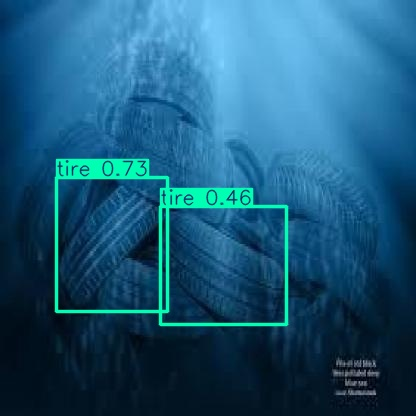

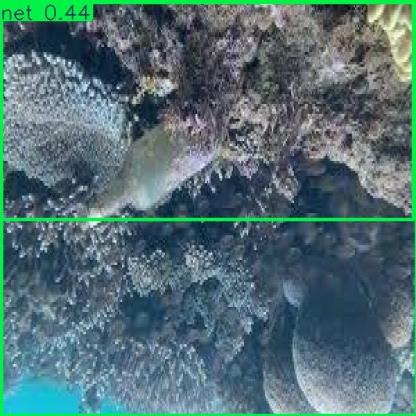

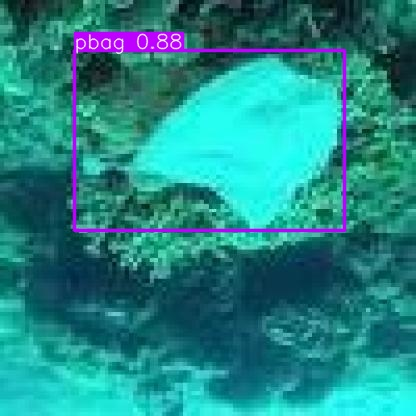

In [21]:
for image_path in glob.glob(f'{home}/runs/detect/train3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## XAI

In [22]:
# needed for yolo_cam
!pip install ttach

In [23]:
import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt
from PIL import Image

In [24]:
!git clone https://github.com/rigvedrs/YOLO-V11-CAM

Cloning into 'YOLO-V11-CAM'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 115 (delta 13), reused 8 (delta 8), pack-reused 94 (from 1)
Receiving objects: 100% (115/115), 41.00 MiB | 10.71 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [25]:
import os

print("Current Directory:", os.getcwd())

os.chdir('./YOLO-V11-CAM')

Current Directory: /content


In [26]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

In [27]:
# switch the model to training mode to compute gradients for cam generation.
model.model.train()

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (2): C3k2(
      (cv1): Conv(
        (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
        (act): SiLU(inplace=True)
      )
      (m): ModuleList(
        (0-1): 2 x C3k(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 

In [54]:
# load a test image using opencv.
img = cv2.imread('/content/datasets/test/images/GettyImageskl-1227891345-1000x667_jpg.rf.b1b21e076c5e516af46499d92e4d57d8.jpg')
# resize the image to match the expected input size for the yolo model
#img = cv2.resize(img, (416, 416))

rgb_img = img.copy()

# normalize the image by converting pixel values to the range [0, 1]
img = np.float32(img) / 255

In [55]:
# convert the image to a tensor if it's not already
rgb_img_tensor = torch.tensor(rgb_img).permute(2, 0, 1).unsqueeze(0).float() / 255.0  # Normalize between 0-1

In [58]:
def show_heatmap(target_layers):
    # initialize the eigancam object with the model and the target layers
    cam = EigenCAM(model, target_layers, task='od')
    # generate the grayscale cam using the specified target layers
    grayscale_cam = cam(rgb_img_tensor)[-1, :, :]
    # overlay the grayscale cam on the original image
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    plt.imshow(cam_image)
    plt.show()

In [62]:
# generate and display the heatmap for a single target layer (second-to-last layer of the model)
show_heatmap(target_layers=[model.model.model[-2]])

IndexError: The shape of the mask [52, 52] at index 0 does not match the shape of the indexed tensor [79, 52, 52] at index 0

In [63]:
# generate and display the heatmap for multiple target layers (last three layers of the model)
show_heatmap(target_layers=[model.model.model[-2], model.model.model[-3], model.model.model[-4]])

IndexError: The shape of the mask [52, 52] at index 0 does not match the shape of the indexed tensor [79, 52, 52] at index 0

In [ ]:
# convert the original rgb image to bgr format (for opencv compatibility)
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
# combine the original image and the cam visualization side-by-side and display them
Image.fromarray(np.hstack((im, cam_image)))